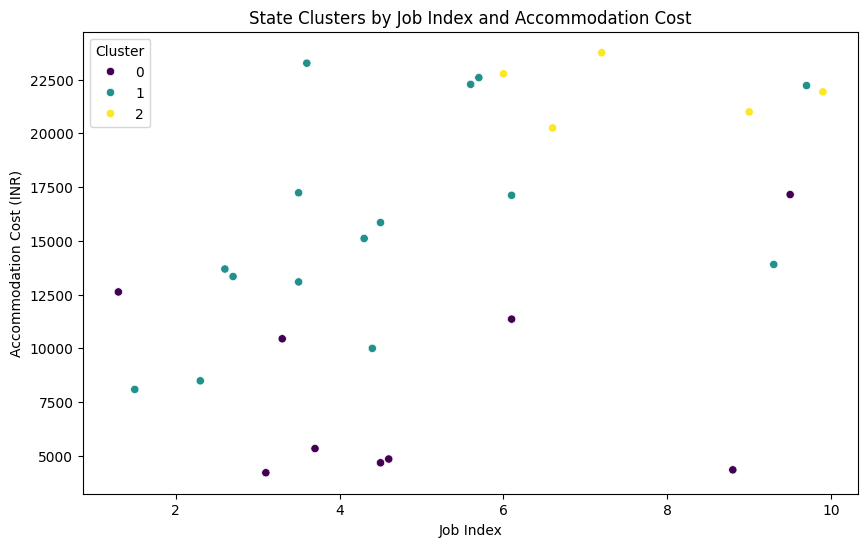

['scaler.pkl']

In [1]:
# 1. Load and explore the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("India_State_Costs_and_Job_Index.csv")
df_numeric = df.drop(columns=["State", "AI Suggestion"])
df_numeric = df_numeric.replace({',': ''}, regex=True).astype(float)

# 2. Preprocess the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 3. KMeans Clustering to group states by cost/job profile
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Save clustered data
df.to_csv("clustered_states.csv", index=False)

# 4. Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Job Index (1-10)'], y=df['Accommodation Cost (INR)'].replace({',': ''}, regex=True).astype(float), hue=df['Cluster'], palette='viridis')
plt.title("State Clusters by Job Index and Accommodation Cost")
plt.xlabel("Job Index")
plt.ylabel("Accommodation Cost (INR)")
plt.show()

# 5. Save model and scaler
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


In [3]:
print(df.columns.tolist())


['State', 'Utilities Cost (INR)', 'Healthcare Cost (INR)', 'Transport Cost (INR)', 'Education Cost (INR)', 'Accommodation Cost (INR)', 'Job Index (1-10)', 'AI Suggestion', 'Cluster']
